In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data=pd.read_csv('train_v9rqX0R.csv')

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df=data[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']]

In [7]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [8]:
df.isnull().sum()

Item_Weight          1463
Item_Visibility         0
Item_MRP                0
Item_Outlet_Sales       0
dtype: int64

C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

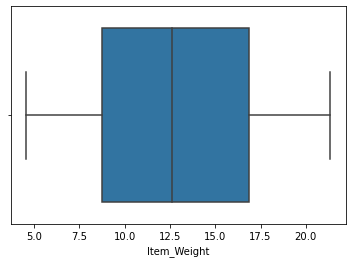

In [9]:
sns.boxplot(df['Item_Weight'])

In [10]:
import statistics

In [18]:
df['Item_Weight']= df.fillna(df['Item_Weight'].mean())

<ipython-input-18-2b98c59e1ce8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight']= df.fillna(df['Item_Weight'].mean())


In [19]:
df.isna().sum()

Item_Weight          0
Item_Visibility      0
Item_MRP             0
Item_Outlet_Sales    0
dtype: int64

C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

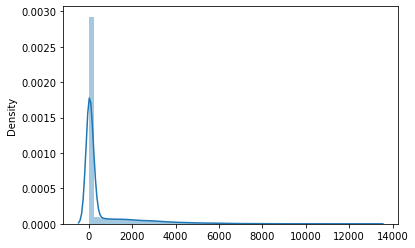

In [20]:
sns.distplot(df)

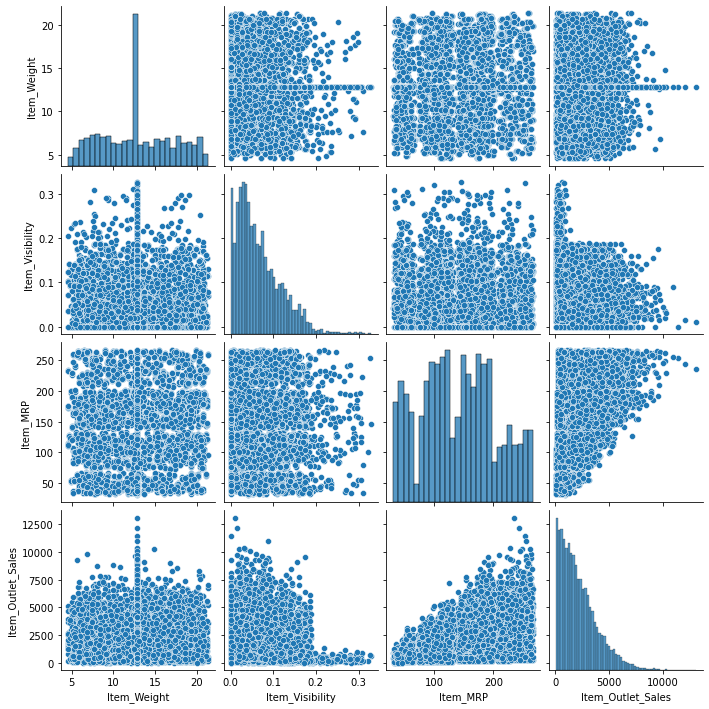

In [21]:
sns.pairplot(df)

In [30]:
from sklearn.model_selection import train_test_split

X = data[['Item_Weight', 'Item_Visibility', 'Item_MRP']]
y = data['Item_Outlet_Sales']

print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

   Item_Weight  Item_Visibility  Item_MRP
0         9.30         0.016047  249.8092
1         5.92         0.019278   48.2692
2        17.50         0.016760  141.6180
3        19.20         0.000000  182.0950
4         8.93         0.000000   53.8614


In [31]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)
print("Scaled Train Data: \n\n")
print(X_train_norm)

Scaled Train Data: 


[[0.47305746 0.09474269 0.31285866]
 [0.17356356 0.         0.77688049]
 [0.55343852 0.15696126 0.47209743]
 ...
 [0.49389699 0.09375994 0.94913208]
 [       nan 0.39486039 0.74522493]
 [       nan 0.33720704 0.01696701]]


In [32]:
X_test_norm = norm.transform(X_test)
print("\n\nScaled Test Data: \n\n")
print(X_test_norm)



Scaled Test Data: 


[[0.47901161 0.29292598 0.76219193]
 [0.47901161 0.09622283 0.60138948]
 [       nan 0.16003641 0.67513362]
 ...
 [0.38374516 0.02728591 0.3730314 ]
 [0.22119678 0.27270601 0.50756202]
 [0.93450432 0.17983153 0.91705207]]


C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

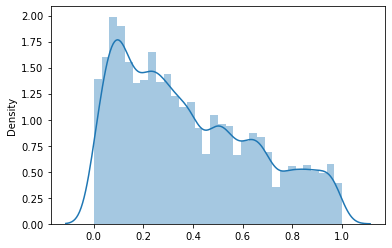

In [33]:
sns.distplot(X_train_norm)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
print(X_train_scaled)

[[-0.07106989 -0.68143995 -0.57180121]
 [-1.15180103 -1.28627424  1.18969403]
 [ 0.21898718 -0.28423861  0.03269263]
 ...
 [ 0.00413009 -0.68771384  1.84358646]
 [        nan  1.23450174  1.06952484]
 [        nan  0.8664446  -1.69504953]]


In [38]:
X_test_scaled=scaler.transform(X_test)

C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

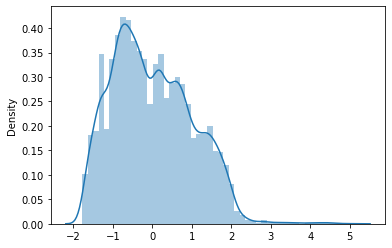

In [35]:
sns.distplot(X_train_scaled)

In [42]:
from sklearn.decomposition import PCA

pca=PCA(.95)
pca.fit(X_train)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').